<a href="https://colab.research.google.com/github/Vaycold/Python_ML/blob/main/Clustering/E-commerce%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce 
_____________

## Load the data

In [69]:
# Install the package
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings 
import matplotlib.pyplot as plt

warnings.filterwarnings(action = 'ignore')
pd.set_option('display.max_columns', None)

In [2]:
# data url
user_meta_url = 'https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_meta_data.csv'
user_statsdata_url = 'https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_data.csv'

user_meta_df = pd.read_csv(user_meta_url, parse_dates=[0])
user_stats_df = pd.read_csv(user_statsdata_url, parse_dates=[0])

     Meta Data
      - user_id         : 고객 고유 ID
      - sex             : 성별(남0, 여1)
      - birthday_year   : 생일년도(yyyy)
      - membership_type : 멤버쉽타입(100 : 비회원, 300. 500: 정회원)
      - category_prefer : 카테고리 선호 입력수
      - joined_date     : 가입일자(yyyy-mm-dd)
      - deleted_date    : 탈퇴일자(yyyy-mm-dd)
      - join_path       : 가입경로(None 일반가입, 1: sns가입)
      - os              : (IOS ,AOS)
      - recommended_cnt : 친구추천 수

In [3]:
# Data shape
print(user_meta_df.shape)
print(user_stats_df.shape)

(3412, 10)
(3412, 11)


In [4]:
user_meta_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1


In [5]:
user_stats_df.head(2)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17


In [6]:
# 컬럼 데이터 타입을 확인해보자
user_meta_df.dtypes

user_id             object
sex                  int64
birthday_year        int64
membership_type      int64
category_prefer      int64
joined_date         object
deleted_date        object
join_path          float64
os                  object
recommended_cnt      int64
dtype: object

In [7]:
# 고객의 나이정보 생성
this_year = 2021
user_meta_df['age'] =this_year - user_meta_df['birthday_year'] + 1
user_meta_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27


In [8]:
# 가입일자를 사용하여 2021년 1월 1일 기준 고객의 가입 기간을 생성해보자
today_ymd = datetime(2021, 1, 1)
user_meta_df['joined_date'] = user_meta_df['joined_date'].astype('datetime64[ns]')

user_meta_df['days_from_joined'] = (today_ymd - user_meta_df['joined_date']).dt.days # 가입기간을 일로 바꾸기
user_meta_df['years_from_joined'] = (today_ymd - user_meta_df['joined_date']) / np.timedelta64(1, 'Y')
user_meta_df['years_from_joined'] = user_meta_df['years_from_joined'].round(1)
user_meta_df.head()


,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23,745,2.0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24,716,2.0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23,422,1.2


In [9]:
# 탈퇴 일자를 사용하여 2021년 1월 1일 기준 고객의 탈퇴 여부를 binary로 나타내보자.
user_meta_df['if_deleted'] = np.where(user_meta_df['deleted_date'] == 'NaT', 0, 1) # 1: 탈퇴함, 0 : 탈퇴하지 않음


In [10]:
user_meta_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23,745,2.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24,716,2.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23,422,1.2,0


     Stats Data
      - user_id          : 고객 고유 ID
      - membership_type  : 멤버쉽타입(100 : 비회원, 300. 500: 정회원)
      - total_order_cnt  : 총 거래 건수
      - total_cost       : 총 거래 금액      
      - avg_coupon_amt   : 평균 쿠폰 사용 금액
      - avg_point_amt    : 평균 포인트사용 금액
      - weekly_order_cnt : 주평균 거래 건수
      - monthly_order_cnt: 월평균 거래 건수
      - avg_cost         : 평균 거래 금액
      - avg_item_cost    : 평균 상품 금액
      - last_date        : 마지막 거래 일자 (yyyy-mm-dd)

In [11]:
user_stats_df.dtypes

user_id               object
membership_type        int64
total_order_cnt      float64
total_cost           float64
avg_coupon_amt       float64
avg_point_amt        float64
weekly_order_cnt     float64
monthly_order_cnt    float64
avg_cost             float64
avg_item_cost        float64
last_date             object
dtype: object

In [12]:
user_stats_df.last_date.min(), user_stats_df.last_date.max()

('2020-01-01', '2020-06-30')

In [13]:
# 마지막 거래일자의 가장 오래된 날짜를 선택하여 Recency의 정도를 알아보는 컬럼을 생성해보자
# 기준점이 마지막 거래일자 직전일이 됨.
oldest_ymd = datetime(2019,12,31)

user_stats_df['last_date'] = user_stats_df['last_date'].astype('datetime64[ns]')
user_stats_df['days_of_recency'] = (user_stats_df['last_date'] - oldest_ymd).dt.days

In [14]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175


## 고객데이터


### EDA

In [70]:
# 1. 컬럼별 Null 값이 있는가?

user_meta_df.isna().sum()
# user_meta_df.isnull().sum(axis=0) 같은방법

user_id              0
sex                  0
birthday_year        0
membership_type      0
category_prefer      0
joined_date          0
deleted_date         0
join_path            0
os                   0
recommended_cnt      0
age                  0
days_from_joined     0
years_from_joined    0
if_deleted           0
dtype: int64

In [71]:
# join path 는 위에서 보면 알 수 있듯이 null값은 일반가입을 의미함
# 그래서 채워주기로 하자.
user_meta_df['join_path'] = user_meta_df['join_path'].fillna(0)

In [72]:
# 2. 고객 메타 데이터는 user_id 기준으로 unique 해야 되기 때문에 중복 데이터를 확인하자
user_meta_df[user_meta_df.duplicated(['user_id'])]

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted


In [73]:
# 중복데이터가 있다면 지우자.
user_meta_df.drop_duplicates(subset='user_id')

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,0.0,AOS,6,23,745,2.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,0.0,AOS,2,24,716,2.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,0.0,AOS,2,23,422,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,K0qchcNENCEDzPH,1,1995,100,5,2019-02-08,NaT,0.0,AOS,3,27,693,1.9,0
3408,EgkSw32Hq7ueGrf,0,1981,100,0,2019-09-05,NaT,0.0,AOS,0,41,484,1.3,0
3409,wvzkibB8S2Oth9b,0,1978,100,0,2017-10-16,NaT,0.0,AOS,0,44,1173,3.2,0
3410,8WI83Ev0nnBfMB7,1,1988,100,8,2017-12-06,NaT,0.0,AOS,0,34,1122,3.1,0


In [74]:
# 멤버쉽 타입별 분포를 확인해보자.

type(user_meta_df.groupby(['membership_type'])[['user_id']].count()) # 대괄호 안에 두개 안에 넣으면 dataframe

pandas.core.frame.DataFrame

In [75]:
type(user_meta_df.groupby(['membership_type'])['user_id'].count()) # 하나만 넣으면 series임.

pandas.core.series.Series

In [76]:
user_meta_df.groupby(['membership_type'])[['user_id']].count()

,user_id
membership_type,
100,2667
300,513
400,126
500,106


In [77]:
user_meta_df.columns

Index(['user_id', 'sex', 'birthday_year', 'membership_type', 'category_prefer',
       'joined_date', 'deleted_date', 'join_path', 'os', 'recommended_cnt',
       'age', 'days_from_joined', 'years_from_joined', 'if_deleted'],
      dtype='object')

In [78]:
# 가입기간에 따른 고객 분포 
user_ct_from_join = user_meta_df.groupby(['years_from_joined'])[['user_id']].count().reset_index()
user_ct_from_join[:10]

,years_from_joined,user_id
0,0.0,64
1,0.1,102
2,0.2,112
3,0.3,128
4,0.4,100
5,0.5,92
6,0.6,119
7,0.7,101
8,0.8,84
9,0.9,118


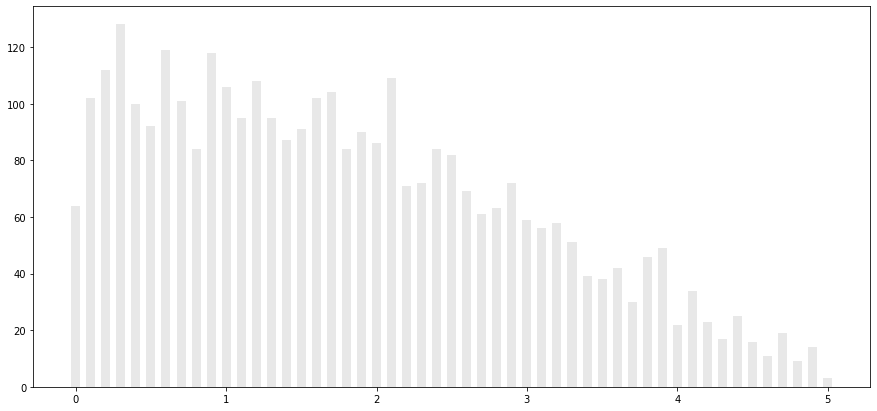

In [79]:

plt.figure(figsize=(15,7))
plt.bar(user_ct_from_join.years_from_joined, user_ct_from_join.user_id,
        width=0.06, alpha=0.09, color='black')
plt.show()


In [80]:
fig  = px.bar(user_ct_from_join,
              x = 'years_from_joined',
              y = 'user_id')
fig.update_layout(height = 500, width = 1000)
fig.show()

# 최근 가입한 유저가 많음.

In [81]:
# 카테고리 선호 입력 수에 따른 고객 분포 확인
user_ct_from_ctg = user_meta_df.groupby(['category_prefer'])[['user_id']].count().reset_index()
fig  = px.bar(user_ct_from_ctg,
              x = 'category_prefer',
              y = 'user_id')
fig.update_layout(height = 500, width = 1000)
fig.show()

In [82]:
user_meta_df.columns

Index(['user_id', 'sex', 'birthday_year', 'membership_type', 'category_prefer',
       'joined_date', 'deleted_date', 'join_path', 'os', 'recommended_cnt',
       'age', 'days_from_joined', 'years_from_joined', 'if_deleted'],
      dtype='object')

In [83]:
# 친구 추천 횟수에 따른 고객 분포 확인
user_ct_from_rcm = user_meta_df.groupby(['recommended_cnt'])[['user_id']].count().reset_index()
fig  = px.bar(user_ct_from_rcm,
              x = 'recommended_cnt',
              y = 'user_id')
fig.update_layout(height = 500, width = 1000)
fig.show()

In [84]:
# 변수간 상관관계 살펴보기
corr_matrix = user_meta_df.corr()

In [85]:
corr_matrix[abs(corr_matrix>=0.5)]

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthday_year,NaN,1.000000,NaN,0.504292,NaN,NaN,NaN,NaN,NaN,NaN
membership_type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_prefer,NaN,0.504292,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
join_path,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
recommended_cnt,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
days_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999718,NaN
years_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999718,1.000000,NaN
if_deleted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [86]:
# 히트맵으로 봐보자
corr_matrix.style.background_gradient()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016351,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138318,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.036992,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007576,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063883,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187304,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138318,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016351,-0.138318,0.036992,-0.007576,-0.063883,0.187304,0.138318,0.999718,1.000000,-0.011358
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011358,1.000000


In [87]:
# age와 recommend의 상관관계를 봐보자

fig = px.scatter(x = user_meta_df['age'],
                 y = user_meta_df['category_prefer'])
fig.update_layout(width = 600, height = 500)
fig.show()

In [88]:
fig = px.scatter(x = user_meta_df['age'],
                 y = user_meta_df['recommended_cnt'])
fig.update_layout(width = 600, height = 500)
fig.show()

In [89]:
user_meta_df.pivot_table(
    values = 'user_id',
    index = 'sex',
    columns = 'join_path',
    aggfunc = 'count'
)

join_path,0.0,1.0
sex,,
0,1253,240
1,1635,284


### Data Cleansing

In [27]:
# numeric type 만 남기기
numerics_types = ['int64' , 'int32', 'int16', 'float64', 'float32','float16']
user_numeric_df = user_meta_df.select_dtypes(include=numerics_types)
user_numeric_df.head()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,0,1995,300,3,0.0,4,27,480,1.3,0
1,1,1995,300,2,0.0,1,27,263,0.7,0
2,1,1999,300,4,0.0,6,23,745,2.0,0
3,0,1998,300,7,0.0,2,24,716,2.0,0
4,1,1999,300,6,0.0,2,23,422,1.2,0


In [28]:
# Binary 변수 제거 하자
user_binary_cols = [col for col in user_numeric_df if np.isin(user_numeric_df[col].unique(), [0,1]).all()] # np.isin 이 안에 값이 해당하는 지 묻는 함수 
user_numeric_df.drop(user_binary_cols, axis=1, inplace=True)
user_numeric_df.head(2)

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1995,300,3,4,27,480,1.3
1,1995,300,2,1,27,263,0.7


In [29]:
# 멤버쉽 변수 분리

user_x_cols = list(user_numeric_df.columns)
user_x_cols.remove('membership_type')
user_x_cols


['birthday_year',
 'category_prefer',
 'recommended_cnt',
 'age',
 'days_from_joined',
 'years_from_joined']

In [30]:
user_numeric_df.describe()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000
mean,1990.516706,153.575615,4.596717,2.291325,31.483294,659.414127,1.805158
std,7.669478,106.964154,3.403961,2.455373,7.669478,443.232127,1.214158
min,1967.000000,100.000000,0.000000,0.000000,16.000000,1.000000,0.000000
25%,1986.000000,100.000000,2.000000,0.000000,26.000000,290.750000,0.800000
50%,1993.000000,100.000000,4.000000,2.000000,29.000000,603.000000,1.700000
75%,1996.000000,100.000000,7.000000,4.000000,36.000000,969.000000,2.700000
max,2006.000000,500.000000,17.000000,21.000000,55.000000,1817.000000,5.000000


### Split the data

In [31]:
x = user_numeric_df[user_x_cols]
y = user_numeric_df['membership_type']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
print(len(train_x), len(test_x))

2729 683


### Clustering - K means

In [32]:
# import the module.
from sklearn.cluster import KMeans

# Find the best k using for elbow method

distortions = []
k_range = range(1,11)
for n in k_range :
    km = KMeans(n_clusters = n, random_state = 42)
    km.fit(train_x)
    distortions.append(km.inertia_.round(2))

In [33]:
distortions

[533421376.87,
 153980365.04,
 70713460.33,
 41297894.0,
 26552399.47,
 18680342.98,
 14072710.57,
 10697240.84,
 8434523.18,
 6752222.61]

In [34]:
fig = px.line(x = k_range,
              y = distortions,
              labels = {'x' : 'k', 'y' : 'distortions'}) # x축 y 축 이름 정하기
fig.update_layout(width = 700, height = 400)
fig.show()

In [35]:
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [36]:
# 훈련된 결과 확인해보기
pd.DataFrame(km.cluster_centers_ ,   columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1991.787444,4.651121,1.913901,30.212556,234.418834,0.642242
1,1989.449298,4.603744,3.012480,32.550702,1292.726989,3.540406
2,1989.944502,4.470709,2.164440,32.055498,725.237410,1.984687


In [37]:
# k를 바꿔서 비교해보기
km = KMeans(n_clusters = 5, random_state = 42)
km.fit(train_x)
pd.DataFrame(km.cluster_centers_ ,   columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1990.973013,4.647676,1.959520,31.026987,434.974513,1.191754
1,1989.718550,4.456290,2.831557,32.281450,1093.496802,2.994030
2,1989.952532,4.443038,2.162975,32.047468,751.284810,2.055380
3,1992.063516,4.612999,1.887740,29.936484,139.407681,0.382275
4,1988.950704,4.809859,3.137324,33.049296,1491.204225,4.083451


In [38]:
# 각 군집별 데이터 수 확인
label_list = list(km.labels_)
[ [x, label_list.count(x)] for x in set(label_list)    ]

[[0, 667], [1, 469], [2, 628], [3, 681], [4, 284]]

In [39]:
# 최종훈련 모델 시각화
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(train_x)
pd.DataFrame(km.cluster_centers_ ,   columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1991.787444,4.651121,1.913901,30.212556,234.418834,0.642242
1,1989.449298,4.603744,3.012480,32.550702,1292.726989,3.540406
2,1989.944502,4.470709,2.164440,32.055498,725.237410,1.984687


In [40]:
train_x['label_km'] = km.labels_
train_x.groupby('label_km')[['birthday_year']].count()

,birthday_year
label_km,
0,1115
1,641
2,973


In [41]:
# Visualizing

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig  = make_subplots(
    rows = 1,
    cols = 2, 
    subplot_titles=('Actual', 'K-means cluster')

)

# Actual

fig.add_trace(
    go.Scatter(
        x = train_x['recommended_cnt'],
        y = train_x['days_from_joined'],
        mode = 'markers',


    ),
    row = 1,
    col = 1
)

# Algorithm

fig.add_trace(
    go.Scatter(
        x = train_x['recommended_cnt'],
        y = train_x['days_from_joined'],
        mode = 'markers',
        marker = dict(color = train_x['label_km'])


    ),
    row = 1,
    col = 2
)

fig.update_layout(width = 1000, height = 600)
fig.show()

In [42]:
# Visualizing

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig  = make_subplots(
    rows = 1,
    cols = 2, 
    subplot_titles=('Actual', 'K-means cluster')

)

# Actual

fig.add_trace(
    go.Scatter(
        x = train_x['recommended_cnt'],
        y = train_x['category_prefer'],
        mode = 'markers',


    ),
    row = 1,
    col = 1
)

# Algorithm

fig.add_trace(
    go.Scatter(
        x = train_x['recommended_cnt'],
        y = train_x['category_prefer'],
        mode = 'markers',
        marker = dict(color = train_x['label_km'])


    ),
    row = 1,
    col = 2
)

fig.update_layout(width = 1000, height = 600)
fig.show()

       # K-means

       차이가 많이 나는 column으로 보면 명확하게 구분이 나지만
       차이가 적게 나는 colum으로 보면 구분할 수 없음.
       
       시각화를 다시 보게 되면 x는 영향이 거의 없고 y에 큰 영향이 있음을 알 수 있다.
       이는 K-means clustering은 거리에 영향을 받는데 단위가 y축(day_from_jointed)가 크기 때문에 저러한 결과가 나타났다고 볼 수 있다.

In [43]:
# 3D 그래프로 변수 3개를 시각화해보자
fig = go.Figure(data = [go.Scatter3d(
    x = train_x['recommended_cnt'],
    y = train_x['days_from_joined'],
    z = train_x['category_prefer'],
    mode = 'markers',
    marker = dict(color=train_x['label_km'])
    
)])
fig.update_layout(width = 600, height = 500)
fig.show()

In [44]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler(feature_range=(0,1))
scaled_user_meta = mm_scaler.fit_transform(user_numeric_df)
scaled_user_meta

array([[0.71794872, 0.5       , 0.17647059, ..., 0.28205128, 0.26376652,
        0.26      ],
       [0.71794872, 0.5       , 0.11764706, ..., 0.28205128, 0.14427313,
        0.14      ],
       [0.82051282, 0.5       , 0.23529412, ..., 0.17948718, 0.40969163,
        0.4       ],
       ...,
       [0.28205128, 0.        , 0.        , ..., 0.71794872, 0.64537445,
        0.64      ],
       [0.53846154, 0.        , 0.47058824, ..., 0.46153846, 0.61729075,
        0.62      ],
       [0.79487179, 0.        , 0.29411765, ..., 0.20512821, 0.10737885,
        0.1       ]])

In [45]:
scaled_user_metadata_df = pd.DataFrame(scaled_user_meta, columns = user_numeric_df.columns)
scaled_user_metadata_df

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.717949,0.5,0.176471,0.190476,0.282051,0.263767,0.26
1,0.717949,0.5,0.117647,0.047619,0.282051,0.144273,0.14
2,0.820513,0.5,0.235294,0.285714,0.179487,0.409692,0.40
3,0.794872,0.5,0.411765,0.095238,0.205128,0.393722,0.40
4,0.820513,0.5,0.352941,0.095238,0.179487,0.231828,0.24
...,...,...,...,...,...,...,...
3407,0.717949,0.0,0.294118,0.142857,0.282051,0.381057,0.38
3408,0.358974,0.0,0.000000,0.000000,0.641026,0.265969,0.26
3409,0.282051,0.0,0.000000,0.000000,0.717949,0.645374,0.64
3410,0.538462,0.0,0.470588,0.000000,0.461538,0.617291,0.62


In [46]:
# 정규화된 데이터를 다시 나누자
x = scaled_user_metadata_df[user_x_cols]
y = scaled_user_metadata_df['membership_type']
train_x, test_x, train_y, test_y  = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [47]:
# 최적의 k를 찾자
!pip install kneed

In [48]:
distortions = []
k_range = range(1,11)
for n in k_range :
    km = KMeans(n_clusters = n, random_state = 24)
    km.fit(train_x)
    distortions.append(km.inertia_)
distortions


[679.4836542879931,
 443.9087526624991,
 294.68843284543493,
 249.2945201913454,
 215.7201661910974,
 191.17156140191497,
 174.98230529754474,
 162.84836313776026,
 152.95230403292962,
 144.00937709433563]

최적의 k : 3
최적의 k의 y값 : 294.688


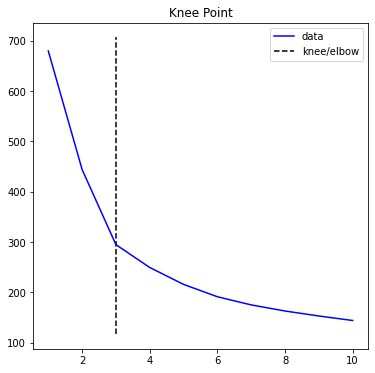

In [49]:
# kneed 모듈을 사용해보자
from kneed import KneeLocator
kneedle = KneeLocator(x = k_range, y = distortions, curve= 'convex', direction = 'decreasing')
print(f'최적의 k : {round(kneedle.elbow, 3)}')
print(f'최적의 k의 y값 : {round(kneedle.elbow_y, 3)}')
kneedle.plot_knee()

In [50]:
km = KMeans(n_clusters = 3)
km.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
user_meta_cluster_centers = pd.DataFrame(km.cluster_centers_ , columns= train_x.columns)
user_meta_cluster_centers

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.622074,0.294325,0.152314,0.377926,0.644393,0.641363
1,0.730290,0.338373,0.112112,0.269710,0.199726,0.199159
2,0.304757,0.090018,0.046737,0.695243,0.296687,0.295387


In [52]:
# 훈련된 모델의 label을 확인하자
user_meta_label_df = train_x.copy()
user_meta_label_df['label_km'] = km.labels_
user_meta_label_df.groupby('label_km')[['age']].count()

,age
label_km,
0,851
1,1284
2,594


In [53]:
# 어느 변수가 분산이 큰 지 확인해보자
user_meta_cluster_centers.std()

birthday_year        0.221163
category_prefer      0.132515
recommended_cnt      0.053286
age                  0.221163
days_from_joined     0.233820
years_from_joined    0.232560
dtype: float64

In [54]:
# 결과를 시각화하자


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig  = make_subplots(
    rows = 1,
    cols = 2, 
    subplot_titles=('Actual', 'K-means cluster')

)

# Actual

fig.add_trace(
    go.Scatter(
        x = user_meta_label_df['recommended_cnt'],
        y = user_meta_label_df['days_from_joined'],
        mode = 'markers',


    ),
    row = 1,
    col = 1
)

# Algorithm

fig.add_trace(
    go.Scatter(
        x = user_meta_label_df['recommended_cnt'],
        y = user_meta_label_df['days_from_joined'],
        mode = 'markers',
        marker = dict(color = user_meta_label_df['label_km'])


    ),
    row = 1,
    col = 2
)

fig.update_layout(width = 1000, height = 600)
fig.show()

In [55]:
fig  = make_subplots(
    rows = 1,
    cols = 2, 
    subplot_titles=('Actual', 'K-means cluster')

)

# Actual

fig.add_trace(
    go.Scatter(
        x = user_meta_label_df['days_from_joined'],
        y = user_meta_label_df['age'],
        mode = 'markers',


    ),
    row = 1,
    col = 1
)

# Algorithm

fig.add_trace(
    go.Scatter(
        x = user_meta_label_df['days_from_joined'],
        y = user_meta_label_df['age'],
        mode = 'markers',
        marker = dict(color = user_meta_label_df['label_km'])


    ),
    row = 1,
    col = 2
)

fig.update_layout(width = 1000, height = 600)
fig.show()

In [56]:
# test set을 사용하여 predict 해보기
test_user_meta_label_df = test_x.copy()
test_cluster = km.fit_predict(test_x)
test_user_meta_label_df['label_km'] = test_cluster

In [57]:
fig  = make_subplots(
    rows = 1,
    cols = 2, 
    subplot_titles=('Actual', 'K-means cluster')

)

# Actual

fig.add_trace(
    go.Scatter(
        x = test_user_meta_label_df['days_from_joined'],
        y = test_user_meta_label_df['age'],
        mode = 'markers',


    ),
    row = 1,
    col = 1
)

# Algorithm

fig.add_trace(
    go.Scatter(
        x = test_user_meta_label_df['days_from_joined'],
        y = test_user_meta_label_df['age'],
        mode = 'markers',
        marker = dict(color = test_user_meta_label_df['label_km'])


    ),
    row = 1,
    col = 2
)

fig.update_layout(width = 1000, height = 600)
fig.show()

In [58]:
# 트레이닝 결과를 원래 데이터셋에 추가

trained_user_meta_df = pd.concat([user_meta_label_df, test_user_meta_label_df])
trained_user_meta_df = user_meta_df.join(trained_user_meta_df['label_km'])
trained_user_meta_df.head(3)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted,label_km
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0,1
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0,1
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,0.0,AOS,6,23,745,2.0,0,1


## 고객 거래데이터

In [91]:
# 모델 훈련에 필요한 column만 취득
user_stats_df.columns

Index(['user_id', 'membership_type', 'total_order_cnt', 'total_cost',
       'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
       'monthly_order_cnt', 'avg_cost', 'avg_item_cost', 'last_date',
       'days_of_recency'],
      dtype='object')

In [92]:
stats_cols = ['total_order_cnt', 'total_cost',
       'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
       'monthly_order_cnt', 'avg_cost', 'avg_item_cost',
       'days_of_recency']
x = user_stats_df[stats_cols]
y = user_stats_df['membership_type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train), len(x_test))

2729 683


In [93]:
# 결과 label을 저장하기 위한 dataframe
hdb_data_df = x_train.copy()

In [94]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 5.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311643 sha256=db0bea049b4140eb5705045396fb65b7ae8177fceba347fde8e085dbcf8456f0
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [95]:
# import hdbscan 
import hdbscan

In [100]:
# min_samples 파라미터를 비교하는 함수
# [eff] min_cluster_size = 30 // label_name = 'label_hdbscan' // x_col = 'total_order_ct' // y_col = 'total_cost' 로 설정
# ms_list = min_samples_list
def opt_hdbscan(x_train, ms_list, data_df, min_cluster_size = 30, label_name = 'label_hdbscan', x_col = 'total_order_ct', y_col = 'total_cost') :
    for min_sample in ms_list :
        labels = hdbscan.HDBSCAN(min_samples=min_sample, min_cluster_size=min_cluster_size, prediction_data=True).fit_predict(x_train)
        data_df[label_name] = labels
        data_df[label_name] = data_df['label_hdbscan'].astype(str)

        # outlier 
        hdbscan_case_dict = dict((x, list(labels).count(x)) for x in set(labels))
        outlier = hdbscan_case_dict[-1]

        # Visualizing
        fig = px.scatter(data_df,
                   x = x_col,
                   y = y_col,
                   color = label_name)
        fig.update_layout(width = 600, height = 500, title = f'min_samples = {min_sample} >> label 수 : {len(set(labels))}, outlier : {outlier} ')
        fig.show()

        # 군집별 데이터 분포
        hdb_cluster_df = data_df.groupby(label_name).mean()
        hdb_cluster_df['point_cent'] = data_df[label_name].value_counts()
        print(hdb_cluster_df)
    
    return data_df

In [103]:
ms_list = [30, 40, 50, 70, 100]
hdb_data_df = opt_hdbscan(x_train, ms_list, hdb_data_df,min_cluster_size = 30, label_name = 'label_hdbscan', x_col = 'total_order_ct', y_col = 'total_cost')

ValueError: ignored

,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,days_of_recency,label_hdbscan
157,1.0,36000.0,0.00000,0.0,1.000000,1.000000,36000.00,31000.00,6,3
1531,43.0,1526300.0,-2116.27907,0.0,2.388889,7.166667,35495.35,22239.53,158,-1
817,1.0,31000.0,0.00000,0.0,1.000000,1.000000,31000.00,31000.00,169,3
2049,1.0,20000.0,0.00000,0.0,1.000000,1.000000,20000.00,20000.00,22,3
2409,1.0,37500.0,0.00000,0.0,1.000000,1.000000,37500.00,34000.00,67,3
...,...,...,...,...,...,...,...,...,...,...
72,1.0,43500.0,0.00000,0.0,1.000000,1.000000,43500.00,40000.00,84,3
1805,1.0,54500.0,0.00000,0.0,1.000000,1.000000,54500.00,52000.00,22,3
3194,1.0,17000.0,0.00000,0.0,1.000000,1.000000,17000.00,0.00,69,3
2138,1.0,38200.0,0.00000,0.0,1.000000,1.000000,38200.00,0.00,14,3
